In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv("C:\\Users\\SRN\\OneDrive\\Desktop\\Python\\projects\\olympics_till_2016\\athlete_events.csv")
region_df=pd.read_csv("C:\\Users\SRN\\OneDrive\\Desktop\\Python\\projects\\olympics_till_2016\\noc_regions.csv")

In [49]:
df.isnull().sum()

df.shape

(271116, 15)

In [50]:
df=df[df['Season']=='Summer']

In [51]:
df.isnull().sum()

df.shape

(222552, 15)

In [52]:
df=df.merge(region_df,on='NOC',how='left')

In [53]:
df.isnull().sum()

df.shape

(222552, 17)

In [54]:
df.drop_duplicates(inplace=True)

In [55]:
df.isnull().sum()

df.shape

(221167, 17)

In [56]:
dummy_medals=pd.get_dummies(df['Medal'])

In [57]:
df=pd.concat([df,dummy_medals],axis=1)

In [58]:
df.isnull().sum()

df.shape

(221167, 20)

In [59]:
medal_df=df.drop_duplicates(subset=['Team','NOC','Games','City','Sport','Event','Medal'])

In [60]:
medal_df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [61]:
medal_df.isnull().sum()

medal_df.shape

(105636, 20)

In [62]:
pred_df=medal_df[['region','Sport','Age','Sex','Height','Weight','Medal']]


In [63]:
pred_df

,region,Sport,Age,Sex,Height,Weight,Medal
0,China,Basketball,24.0,M,180.0,80.0,NaN
1,China,Judo,23.0,M,170.0,60.0,NaN
2,Denmark,Football,24.0,M,NaN,NaN,NaN
3,Denmark,Tug-Of-War,34.0,M,NaN,NaN,Gold
4,Netherlands,Athletics,18.0,F,168.0,NaN,NaN
...,...,...,...,...,...,...,...
222528,Russia,Athletics,25.0,F,168.0,80.0,Silver
222530,Russia,Athletics,33.0,F,168.0,80.0,Bronze
222536,Poland,Swimming,19.0,M,189.0,80.0,NaN
222537,Poland,Swimming,19.0,M,189.0,80.0,NaN


In [64]:
pred_df.isnull().sum()

pred_df.shape

(105636, 7)

In [65]:
num=pred_df.select_dtypes(include=['number']).columns
cat=pred_df.select_dtypes(include=['object','category']).columns
print('\nNumeric columns: ',num)
print('\nCategoric columns: ',cat)


Numeric columns:  Index(['Age', 'Height', 'Weight'], dtype='object')

Categoric columns:  Index(['region', 'Sport', 'Sex', 'Medal'], dtype='object')


In [66]:
#filling the missing values in numerical columns
#with the median value of the respective columns
pred_df[num]=pred_df[num].fillna(pred_df[num].median())

C:\Users\SRN\AppData\Local\Temp\ipykernel_10192\3054954256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df[num]=pred_df[num].fillna(pred_df[num].median())


In [67]:
# pred_df['region']=pred_df['region'].fillna('Independent',inplace=True) 

In [68]:
pred_df['region'].fillna('Independent',inplace=True) 

C:\Users\SRN\AppData\Local\Temp\ipykernel_10192\1107125486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['region'].fillna('Independent',inplace=True)


In [69]:
pred_df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', 'Independent', 'Uzbekistan', 'Kyrgyzstan',
       'Tajikistan', 'Japan', 'Republic of Congo', 'Switzerland',
       'Brazil', 'Monaco', 'Israel', 'Uruguay', 'Sweden', 'Sri Lanka',
       'Armenia', 'Ivory Coast', 'Ke

In [70]:
#replacing the nan value in medal column with 0
pred_df['Medal'].fillna('None', inplace=True)

C:\Users\SRN\AppData\Local\Temp\ipykernel_10192\611730308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['Medal'].fillna('None', inplace=True)


In [71]:
pred_df['Medal'].unique()

array(['None', 'Gold', 'Bronze', 'Silver'], dtype=object)

In [72]:
pred_df.isnull().sum()

pred_df.shape

(105636, 7)

In [73]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105636 entries, 0 to 222541
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   region  105636 non-null  object 
 1   Sport   105636 non-null  object 
 2   Age     105636 non-null  float64
 3   Sex     105636 non-null  object 
 4   Height  105636 non-null  float64
 5   Weight  105636 non-null  float64
 6   Medal   105636 non-null  object 
dtypes: float64(3), object(4)
memory usage: 6.4+ MB


In [74]:
pred_df.columns

Index(['region', 'Sport', 'Age', 'Sex', 'Height', 'Weight', 'Medal'], dtype='object')

In [75]:
for i in cat:
    a=pred_df[i].unique()
    print(i,a)

region ['China' 'Denmark' 'Netherlands' 'Finland' 'Norway' 'Romania' 'Estonia'
 'France' 'Morocco' 'Spain' 'Egypt' 'Iran' 'Bulgaria' 'Italy' 'Chad'
 'Azerbaijan' 'Sudan' 'Russia' 'Argentina' 'Cuba' 'Belarus' 'Greece'
 'Cameroon' 'Turkey' 'Chile' 'Mexico' 'USA' 'Nicaragua' 'Hungary'
 'Nigeria' 'Algeria' 'Kuwait' 'Bahrain' 'Pakistan' 'Iraq' 'Syria'
 'Lebanon' 'Qatar' 'Malaysia' 'Germany' 'Canada' 'Ireland' 'Australia'
 'South Africa' 'Eritrea' 'Tanzania' 'Jordan' 'Tunisia' 'Libya' 'Belgium'
 'Djibouti' 'Palestine' 'Comoros' 'Kazakhstan' 'Brunei' 'India'
 'Saudi Arabia' 'Maldives' 'Ethiopia' 'United Arab Emirates' 'Yemen'
 'Indonesia' 'Philippines' 'Independent' 'Uzbekistan' 'Kyrgyzstan'
 'Tajikistan' 'Japan' 'Republic of Congo' 'Switzerland' 'Brazil' 'Monaco'
 'Israel' 'Uruguay' 'Sweden' 'Sri Lanka' 'Armenia' 'Ivory Coast' 'Kenya'
 'Benin' 'UK' 'Ghana' 'Somalia' 'Niger' 'Mali' 'Afghanistan' 'Poland'
 'Costa Rica' 'Panama' 'Georgia' 'Slovenia' 'Guyana' 'New Zealand'
 'Portugal' 'Paraguay'

In [76]:
for i in num:
    d_count=round(pred_df[i].count(),2)
    d_max=round(pred_df[i].max(),2)
    d_min=round(pred_df[i].min(),2)
    d_mean=round(pred_df[i].mean(),2)
    d_median=round(pred_df[i].median(),2)
    d_std=round(pred_df[i].std(),2)

    print(i,'count:',d_count)
    print(i,'max:',d_max)
    print(i,'min:',d_min)
    print(i,'mean:',d_mean)
    print(i,'median:',d_median)
    print(i,'std:',d_std)
    print('------------------------------------')

Age count: 105636
Age max: 84.0
Age min: 11.0
Age mean: 25.31
Age median: 24.0
Age std: 6.08
------------------------------------
Height count: 105636
Height max: 218.0
Height min: 127.0
Height mean: 174.95
Height median: 175.0
Height std: 9.3
------------------------------------
Weight count: 105636
Weight max: 214.0
Weight min: 28.0
Weight mean: 70.38
Weight median: 69.0
Weight std: 13.88
------------------------------------


In [77]:
for i in num:
    q1=np.quantile(pred_df[i],0.25)
    q2=np.quantile(pred_df[i],0.50)
    q3=np.quantile(pred_df[i],0.75)
    print(i,'q1:',q1)
    print(i,'q2:',q2)
    print(i,'q3:',3)
    print('------------')

Age q1: 21.0
Age q2: 24.0
Age q3: 3
------------
Height q1: 170.0
Height q2: 175.0
Height q3: 3
------------
Weight q1: 62.0
Weight q2: 69.0
Weight q3: 3
------------


In [78]:
corr=pred_df.corr(numeric_only=True)
corr

,Age,Height,Weight
Age,1.000000,0.086338,0.156125
Height,0.086338,1.000000,0.729264
Weight,0.156125,0.729264,1.000000


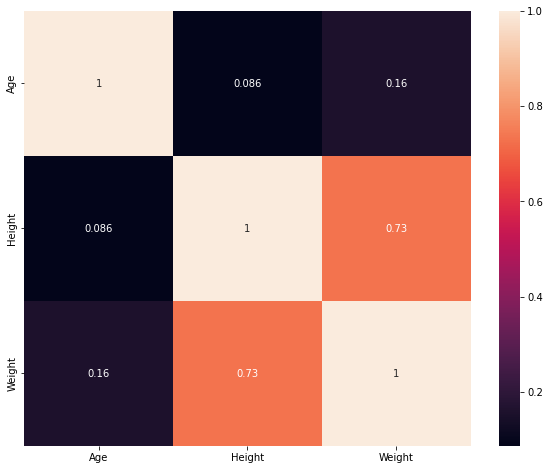

In [79]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.show()

In [80]:
for i in (num):
    print(i,pred_df[i].skew())

Age 1.4915575714135743
Height -0.032149304371438196
Weight 1.3421900577279182


## Machine Learning part

### Objective:

#### To predict the "medal winning"  based on 'region', 'age', 'sport', 'height', and 'weight' of a player

In [81]:
for i in cat:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    pred_df[i]=le.fit_transform(pred_df[i])

C:\Users\SRN\AppData\Local\Temp\ipykernel_10192\2671899304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df[i]=le.fit_transform(pred_df[i])
C:\Users\SRN\AppData\Local\Temp\ipykernel_10192\2671899304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df[i]=le.fit_transform(pred_df[i])
C:\Users\SRN\AppData\Local\Temp\ipykernel_10192\2671899304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [82]:
X=pred_df.drop('Medal',axis=1)

y=pred_df['Medal']

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [85]:
print(pred_df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105636, 7)
(73945, 6)
(31691, 6)
(73945,)
(31691,)


### KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier
KNNtree=KNeighborsClassifier()
KNNtree.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
y_pred_KNN=KNNtree.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_KNN = round(accuracy_score(y_test, y_pred_KNN)*100, 2)
f1_KNN = round(f1_score(y_test, y_pred_KNN, average='macro'), 2)
precision_KNN = round(precision_score(y_test, y_pred_KNN, average='macro'), 2)
recall_KNN = round(recall_score(y_test, y_pred_KNN, average='macro'), 2)

print("Accuracy:", acc_KNN)
print("F1 Score:", f1_KNN)
print("Precision:", precision_KNN)
print("Recall:", recall_KNN)


Accuracy: 82.42
F1 Score: 0.29
Precision: 0.33
Recall: 0.29


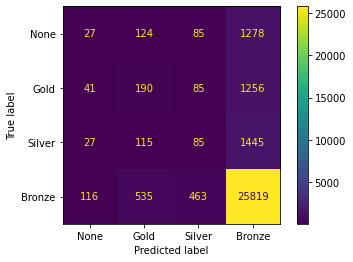

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a dictionary mapping numerical labels to class names
label_mapping = {
    0: 'None',
    1: 'Gold',
    2: 'Silver',
    3: 'Bronze'
}

# Map numerical labels to class names in y_test and y_pred_KNN
y_test_mapped = [label_mapping[label] for label in y_test]
y_pred_mapped = [label_mapping[label] for label in y_pred_KNN]

# Compute confusion matrix using mapped labels
cmt = confusion_matrix(y_test_mapped, y_pred_mapped)

# Create ConfusionMatrixDisplay with appropriate display labels
disp = ConfusionMatrixDisplay(confusion_matrix=cmt, display_labels=label_mapping.values())

# Plot confusion matrix
disp.plot()
plt.grid(False)
plt.show()


Training Accuracy: 0.8576239096625871
Testing Accuracy: 0.8242403205957527

Classification Report for Training Data:
              precision    recall  f1-score   support

        None       0.44      0.18      0.25      3940
        Gold       0.47      0.29      0.36      3674
      Silver       0.88      0.98      0.93     62629
      Bronze       0.54      0.08      0.14      3702

    accuracy                           0.86     73945
   macro avg       0.58      0.38      0.42     73945
weighted avg       0.82      0.86      0.82     73945


Classification Report for Testing Data:
              precision    recall  f1-score   support

        None       0.12      0.05      0.07      1672
        Gold       0.20      0.12      0.15      1572
      Silver       0.87      0.96      0.91     26933
      Bronze       0.13      0.02      0.03      1514

    accuracy                           0.82     31691
   macro avg       0.33      0.29      0.29     31691
weighted avg       0.76    

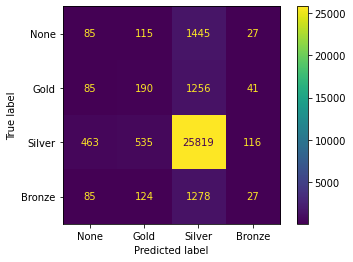

In [90]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, y_train, X_test, y_test, label_mapping):
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict labels for training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute accuracy for training and testing data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    
    # Classification report for training and testing data
    print("\nClassification Report for Training Data:")
    print(classification_report(y_train, y_train_pred, target_names=label_mapping.values()))
    
    print("\nClassification Report for Testing Data:")
    print(classification_report(y_test, y_test_pred, target_names=label_mapping.values()))
    
    # Confusion matrix for testing data
    cmt = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cmt, display_labels=label_mapping.values())
    disp.plot()
    plt.grid(False)
    plt.show()

# Usage example:
# Assuming you have your model (e.g., model = SomeClassifier()), X_train, X_test, y_train, y_test, and label_mapping

# Call the function to evaluate the model
# Initialize KNN model
knn_model = KNeighborsClassifier()

# Call the evaluate_model function
evaluate_model(knn_model, X_train, y_train, X_test, y_test, label_mapping)

#### Decision Tree Classifier

In [91]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [92]:
y_pred_dt=dtree.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [94]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Accuracy
acc_dt = round(accuracy_score(y_test, y_pred_dt) * 100, 2)

# F1 score (using 'macro' averaging)
f1_dt = round(f1_score(y_test, y_pred_dt, average='macro'), 2)

# Precision (using 'macro' averaging)
precision_dt = round(precision_score(y_test, y_pred_dt, average='macro'), 2)

# Recall (using 'macro' averaging)
recall_dt = round(recall_score(y_test, y_pred_dt, average='macro'), 2)

# Print the results
print("Accuracy:", acc_dt)
print("F1 Score:", f1_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print(classification_report(y_test,y_pred_dt))



Accuracy: 77.0
F1 Score: 0.33
Precision: 0.33
Recall: 0.33
              precision    recall  f1-score   support

           0       0.11      0.13      0.12      1672
           1       0.19      0.21      0.20      1572
           2       0.89      0.88      0.89     26933
           3       0.10      0.10      0.10      1514

    accuracy                           0.77     31691
   macro avg       0.33      0.33      0.33     31691
weighted avg       0.78      0.77      0.77     31691



Training Accuracy: 0.9613496517682061
Testing Accuracy: 0.7697137988703417

Classification Report for Training Data:
              precision    recall  f1-score   support

        None       0.80      0.90      0.85      3940
        Gold       0.83      0.88      0.86      3674
      Silver       0.98      0.99      0.98     62629
      Bronze       0.97      0.70      0.82      3702

    accuracy                           0.96     73945
   macro avg       0.90      0.87      0.88     73945
weighted avg       0.96      0.96      0.96     73945


Classification Report for Testing Data:
              precision    recall  f1-score   support

        None       0.11      0.13      0.12      1672
        Gold       0.19      0.22      0.20      1572
      Silver       0.89      0.88      0.89     26933
      Bronze       0.10      0.10      0.10      1514

    accuracy                           0.77     31691
   macro avg       0.33      0.33      0.33     31691
weighted avg       0.78    

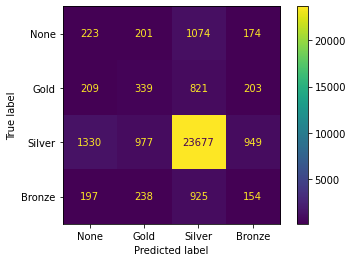

In [95]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, y_train, X_test, y_test, label_mapping):
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict labels for training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute accuracy for training and testing data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    
    # Classification report for training and testing data
    print("\nClassification Report for Training Data:")
    print(classification_report(y_train, y_train_pred, target_names=label_mapping.values()))
    
    print("\nClassification Report for Testing Data:")
    print(classification_report(y_test, y_test_pred, target_names=label_mapping.values()))
    
    # Confusion matrix for testing data
    cmt = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cmt, display_labels=label_mapping.values())
    disp.plot()
    plt.grid(False)
    plt.show()


tree_model = DecisionTreeClassifier()
evaluate_model(tree_model, X_train, y_train, X_test, y_test, label_mapping)

#### Gussian Naive Bayes

In [96]:
from sklearn.naive_bayes import GaussianNB
NBtree=GaussianNB()
NBtree.fit(X_train,y_train)

GaussianNB()

In [97]:
y_pred_NB=NBtree.predict(X_test)

Accuracy: 84.89
F1 Score: 0.23
Precision: 0.5
Recall: 0.25
Training Accuracy: 0.8459801203597268
Testing Accuracy: 0.8488529866523619

Classification Report for Training Data:
              precision    recall  f1-score   support

        None       0.13      0.00      0.01      3940
        Gold       0.07      0.00      0.00      3674
      Silver       0.85      1.00      0.92     62629
      Bronze       0.00      0.00      0.00      3702

    accuracy                           0.85     73945
   macro avg       0.26      0.25      0.23     73945
weighted avg       0.73      0.85      0.78     73945


Classification Report for Testing Data:


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: Unde

              precision    recall  f1-score   support

        None       0.15      0.00      0.01      1672
        Gold       0.00      0.00      0.00      1572
      Silver       0.85      1.00      0.92     26933
      Bronze       0.00      0.00      0.00      1514

    accuracy                           0.85     31691
   macro avg       0.25      0.25      0.23     31691
weighted avg       0.73      0.85      0.78     31691



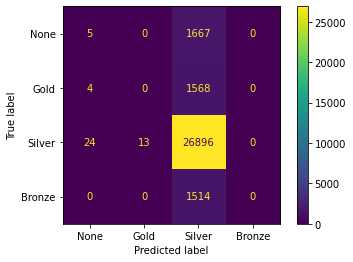

In [98]:
from sklearn.naive_bayes import GaussianNB

# Initialize Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train, y_train)

# Predict labels for testing data
y_pred_nb = nb_model.predict(X_test)

# Compute evaluation metrics
acc_nb = round(accuracy_score(y_test, y_pred_nb) * 100, 2)
f1_nb = round(f1_score(y_test, y_pred_nb, average='macro', zero_division=1), 2)
precision_nb = round(precision_score(y_test, y_pred_nb, average='macro', zero_division=1), 2)
recall_nb = round(recall_score(y_test, y_pred_nb, average='macro', zero_division=1), 2)

print("Accuracy:", acc_nb)
print("F1 Score:", f1_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)

# Evaluate the model using the evaluate_model function
evaluate_model(nb_model, X_train, y_train, X_test, y_test, label_mapping)



#### Random Forest

Accuracy: 83.52
F1 Score: 0.32
Precision: 0.37
Recall: 0.31
Training Accuracy: 0.9613361282033944
Testing Accuracy: 0.8350635827206463

Classification Report for Training Data:
              precision    recall  f1-score   support

        None       0.92      0.76      0.83      3940
        Gold       0.89      0.82      0.85      3674
      Silver       0.97      0.99      0.98     62629
      Bronze       0.90      0.76      0.82      3702

    accuracy                           0.96     73945
   macro avg       0.92      0.83      0.87     73945
weighted avg       0.96      0.96      0.96     73945


Classification Report for Testing Data:
              precision    recall  f1-score   support

        None       0.15      0.05      0.07      1672
        Gold       0.29      0.14      0.19      1572
      Silver       0.88      0.97      0.92     26933
      Bronze       0.15      0.06      0.09      1514

    accuracy                           0.84     31691
   macro avg       0.

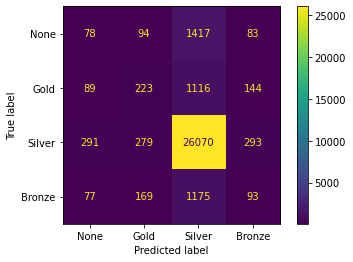

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier()

# Fit the model
rf_model.fit(X_train, y_train)

# Predict labels for testing data
y_pred_rf = rf_model.predict(X_test)

# Compute evaluation metrics
acc_rf = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
f1_rf = round(f1_score(y_test, y_pred_rf, average='macro'), 2)
precision_rf = round(precision_score(y_test, y_pred_rf, average='macro'), 2)
recall_rf = round(recall_score(y_test, y_pred_rf, average='macro'), 2)

print("Accuracy:", acc_rf)
print("F1 Score:", f1_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)

# Evaluate the model using the evaluate_model function
evaluate_model(rf_model, X_train, y_train, X_test, y_test, label_mapping)


### Conclusion

##### Random Forest (RF):

* The model achieves a high training accuracy of approximately 96.22%.

* The testing accuracy is slightly lower, around 82.29%.

* RF achieves high training accuracy but slightly lower testing accuracy.

* It may be overfitting the training data to some extent.

* RF is robust and often performs well across various types of datasets.

* Suitable for tasks where high accuracy is crucial and computational resources allow for more complex models.


##### Gaussian Naive Bayes (GNB):

* The model has a training accuracy of about 84.83%.

* The testing accuracy is similar, around 84.33%.

* GNB shows consistent performance on both training and testing data.

* It has relatively lower accuracy compared to other models but may be more robust to overfitting.

* GNB is computationally efficient and works well with smaller datasets.

* Suitable for tasks where interpretability and simplicity are important, or when computational resources are limited.


##### Decision Tree (DT):

* The training accuracy is again high, at approximately 96.22%.

* However, the testing accuracy is relatively lower, about 76.70%.

* DT shows signs of significant overfitting, with a large drop in testing accuracy compared to training accuracy.

* While decision trees are simple and interpretable, they tend to perform poorly on unseen data when overfit.

* DT may not be the best choice unless overfitting can be effectively addressed through techniques like pruning or ensemble methods.


##### K-Nearest Neighbors (KNN):

* The model achieves a training accuracy of around 85.85%.

* The testing accuracy is slightly lower, at approximately 82.27%.

* KNN exhibits a slight overfitting tendency similar to RF.

* It is intuitive and easy to understand but can be computationally expensive for large datasets.

* KNN's performance heavily depends on the choice of distance metric and the number of neighbors.

* Suitable for tasks where the underlying relationships in the data are assumed to be locally smooth and there's a need for simplicity.



#### Considering the above points:

If interpretability and computational efficiency are important,

* "Gaussian Naive Bayes" might be the most suitable choice.

If maximizing accuracy is the primary concern and computational resources allow,

* "Random Forest" could be a better option,

provided overfitting can be effectively addressed through techniques like hyperparameter tuning or model ensembles.